In [2]:
from model import *

In [4]:
batch_size = 20
mode1 = 5
mode2 = 5
width = 20
res_x = 8
res_y = 8
resolution =64
x = torch.ones(batch_size ,res_x, res_y,10)
model = FNO2d(mode1, mode2,  width,resolution)
a = model(x)

/opt/conda/envs/pytorch-py3.8/lib/python3.8/site-packages/torchvision/transforms/functional.py:417: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [22]:
import numpy as np
from numpy import sin,cos,pi,exp
import torch 
from model import Heat_forward
def ture_u(x,y,t):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

def init_u(x,y):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

def source(x,y,t):
    k =1/16
    return (-1+k*8*np.pi**2)*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

n_x = 40
n_y = 40
domain = [0,1,0,1]
T = 1
n_t  = 100
x = np.linspace(domain[0],domain[1],n_x)
y = np.linspace(domain[2],domain[3],n_y)
t= np.linspace(0,T,n_t)
dx = (domain[1] - domain[0])/n_x
dy = (domain[3] - domain[2])/n_y
dt = T/n_t
alpha = 1/16
r = alpha*dt/dx/dx
fdm = Heat_forward(n_x =n_x,dt = dt , alpha = alpha)


U = torch.Tensor(np.zeros((len(x),len(y),len(t),1)))

node = (len(x))*(len(y))   #自由度个数


#定义初值
X,Y = np.meshgrid(x,y)

U[:,:,0,0] = torch.Tensor(init_u(X,Y))


time = 0

for i in range(n_t-1):
    time = time+dt
    f_old = torch.Tensor(source(X,Y,time-dt)).unsqueeze(-1)
    f_new = torch.Tensor(source(X,Y,time)).unsqueeze(-1)
    input = torch.cat((U[:,:,i,:],f_old,f_new),2)
    U[:,:,i+1,0] = fdm(input)
#print(U[:,:,-1])
TURE_U = ture_u(X,Y,1)   #t =1 时刻真解





/tmp/ipykernel_13883/2166107996.py:59: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)
/tmp/ipykernel_13883/2166107996.py:63: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)


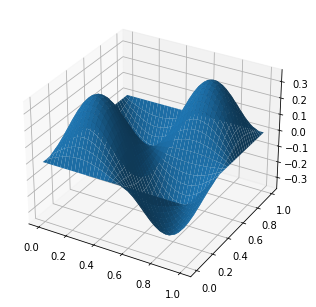

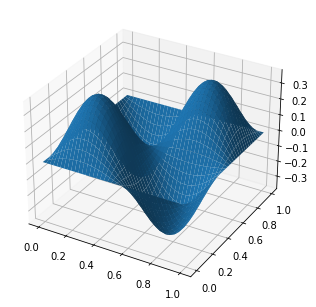

/tmp/ipykernel_18679/1277695853.py:60: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)
/tmp/ipykernel_18679/1277695853.py:65: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)


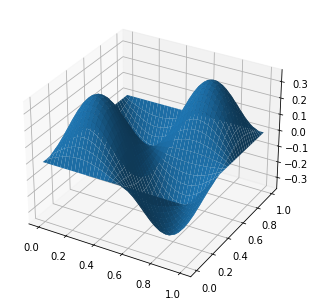

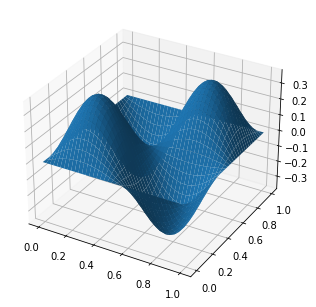

In [4]:
import numpy as np
from numpy import sin,cos,pi,exp
import torch 
from model import Heat_forward
def ture_u(x,y,t):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

def init_u(x,y):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

def source(x,y,t):
    k =1/16
    return (-1+k*8*np.pi**2)*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

n_x = 40
n_y = 40
domain = [0,1,0,1]
T = 1
n_t  = 100
x = np.linspace(domain[0],domain[1],n_x)
y = np.linspace(domain[2],domain[3],n_y)
t= np.linspace(0,T,n_t)
dx = (domain[1] - domain[0])/n_x
dy = (domain[3] - domain[2])/n_y
dt = T/n_t
alpha = 1/16
r = alpha*dt/dx/dx
fdm = Heat_forward(n_x =n_x,dt = dt , alpha = alpha)

batch = 3
U = torch.Tensor(np.zeros((batch,len(x),len(y),len(t),1)))

node = (len(x))*(len(y))   #自由度个数


#定义初值
X,Y = np.meshgrid(x,y)


U[:,:,:,0,0] = torch.Tensor(init_u(X,Y)).unsqueeze(0).repeat([batch,1,1])


time = 0

for i in range(n_t-1):
    time = time+dt
    f_old = torch.Tensor(source(X,Y,time-dt)).reshape([1,n_x,n_y,1]).repeat([batch,1,1,1])
    f_new = torch.Tensor(source(X,Y,time)).reshape([1,n_x,n_y,1]).repeat([batch,1,1,1])
    input = torch.cat((U[:,:,:,i,:],f_old,f_new),3)
    U[:,:,:,i+1,0] = fdm(input)
#print(U[:,:,-1])
TURE_U = ture_u(X,Y,1)   #t =1 时刻真解



U1 = U[2,:,:,-1,0].detach().numpy()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,U1)
plt.savefig('1.png')

fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,TURE_U)
plt.savefig('2.png')

/tmp/ipykernel_24750/3580838141.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)
/tmp/ipykernel_24750/3580838141.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)


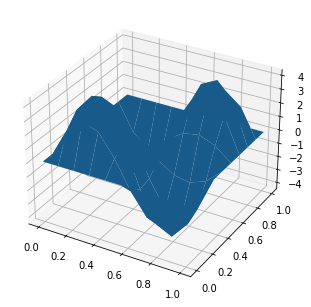

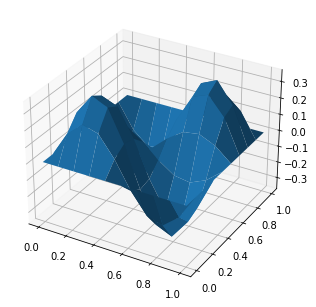

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,U[:,:,-1])

fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,TURE_U)

In [2]:
from Buffer import ReplayBuffer
import torch


In [1]:
import gym
import Heat
from Buffer import ReplayBuffer
import torch
import numpy as np
obs_dim  =10
act_dim = 6
init_step = 100
buffer_init = ReplayBuffer( obs_dim = obs_dim, act_dim = act_dim, size = 500)
env = gym.make('Heat_d-v0')

for step in range(init_step):
    action = env.action_space.sample()   # 从动作空间中随机选取一个动作
    observation = torch.Tensor(env.get_value())
    observation1, reward, done, info = env.step(action)  # 用于提交动作，括号内是具体的动作
    observation1 = torch.Tensor(observation1)
    reward = torch.Tensor(np.array(reward))
    action1 = torch.Tensor(action)
    done1= torch.Tensor(np.array(done,dtype = np.float32))
    buffer_init.store(obs = observation , act = action1, rew = reward, next_obs = observation1,done = done1,store_size = 1)
    print(step)
    if done :
        env.reset()
env.close()

/opt/conda/envs/pytorch-py3.8/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


num of vertices 1089
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [1]:
import torch
idxs = torch.randint(0, 200-4, size=(20,))
idx = idxs.clone()
n_step  = 4
idxs = idxs.unsqueeze(-1)
idx = idx.unsqueeze(-1)
for i in range(n_step-1):
        print(i)
        idxs = torch.cat((idxs,idx+i+1),dim = 1)
idx_obs = idxs.reshape(-1)
idx_act = idxs[:,:-1].reshape(-1)

0
1
2


/opt/conda/envs/pytorch-py3.8/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


num of vertices 1089
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    weight_decay: 1e-05
)
ptr 300
ptr 300 obs: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.2270e-04,  4.4619e-03,  4.1890e-03,  1.2414e-03,
         -9.3699e-04,  1.6172e-04,  3.5307e-03,  4.5273e-03,  2.4804e-20],
        [ 0.0000e+00,  3.4769e-03,  9.3422e-03,  6.8264e-03,  3.4280e-04,
         -4.3005e-03, -2.9388e-03,  3.3191e-03,  6.5438e-03,  4.8013e-20],
        [ 0.0000e+00,  1.8043e-03,  5.1669e-03, -3.7241e-05, -8.4121e-03,
         -1.3625e-02, -1.1031e-02, -1.6948e-03,  5.2482e-03,  8.8397e-20],
        [ 0.0000e+00, -2.6609e-03, -2.9931e-03, -9.8445e-03, -1.7958e-02,
         -2.1499e-02, -1.6479e-02, -4.5451e-03,  4.8176e-03, -3.1417e-20],
        

/tmp/ipykernel_72035/321238477.py:33: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)
/tmp/ipykernel_72035/321238477.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)


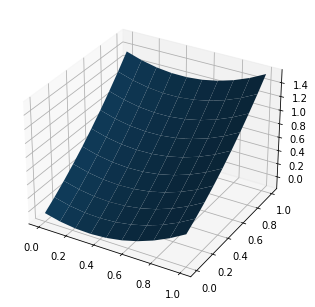

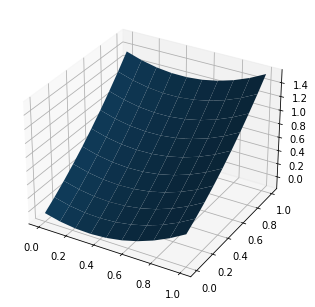

In [1]:
import torch
import torch.nn as nn
import gym
import Heat
import numpy as np
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader

from main_PIPOMDP import heat_eqn

device = torch.device('cpu')
model = heat_eqn(exp_step = 300, total_step = 10000,update_freq_model = 10 , update_freq_policy = 10, device = device)
model.init_variable()
print(model.optimizer)
model.exp_step()
print('ptr',model.data_real.ptr)
print('ptr',model.data_real.ptr,'obs:',model.data_real.obs_buf[model.data_real.ptr-1],'act:',model.data_real.act_buf[model.data_real.ptr-1])
print('obs_shape',model.data_real.obs_buf.shape) # 500,10,10

a,xy ,a_c= model.train_SFNO_test(n_step = 5,batch_size=20)
print(model.grid.shape) # batch_size , n_step-1 , gridx, gridy , 2
a_c = a_c.numpy()
a = a.numpy()
xy = xy.numpy()
X = xy[:,:,0]
Y = xy[:,:,1]
a_true = a_c[0] + a_c[1]*X+a_c[2]*Y +a_c[3]*X*X+a_c[4]*Y*Y+ a_c[5]*X*Y

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,a)

fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,a_true)




/tmp/ipykernel_7112/927514188.py:59: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)
/tmp/ipykernel_7112/927514188.py:64: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3d = Axes3D(fig)


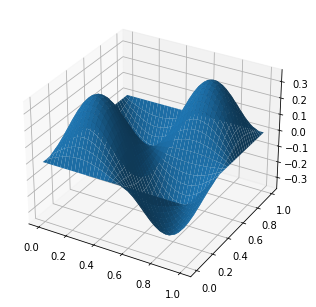

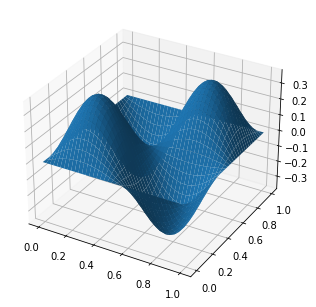

In [1]:
import numpy as np
from numpy import sin,cos,pi,exp
import torch 
from model import Heat_forward
def ture_u(x,y,t):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

def init_u(x,y):
    return np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

def source(x,y,t):
    k =1/16
    return (-1+k*8*np.pi**2)*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)*np.exp(-t)

n_x = 40
n_y = 40
domain = [0,1,0,1]
T = 1
n_t  = 100
x = np.linspace(domain[0],domain[1],n_x)
y = np.linspace(domain[2],domain[3],n_y)
t= np.linspace(0,T,n_t)
dx = (domain[1] - domain[0])/n_x
dy = (domain[3] - domain[2])/n_y
dt = T/n_t
alpha = 1/16
r = alpha*dt/dx/dx
fdm = Heat_forward(n_x =n_x,dt = dt , alpha = alpha)


U = torch.Tensor(np.zeros((len(x),len(y),len(t),1)))

node = (len(x))*(len(y))   #自由度个数


#定义初值
X,Y = np.meshgrid(x,y)

U[:,:,0,0] = torch.Tensor(init_u(X,Y))


time = 0

for i in range(n_t-1):
    time = time+dt
    f_old = torch.Tensor(source(X,Y,time-dt)).unsqueeze(-1)
    f_new = torch.Tensor(source(X,Y,time)).unsqueeze(-1)
    input = torch.cat((f_old,U[:,:,i,:],f_new),2)
    U[:,:,i+1,0] = fdm(input)
#print(U[:,:,-1])
TURE_U = ture_u(X,Y,1)   #t =1 时刻真解



U1 = U[:,:,-1,0].detach().numpy()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,U1)
#plt.savefig('1.png')

fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.plot_surface(X,Y,TURE_U)
#plt.savefig('2.png')